# Name: Peihang Xu

## Assignment for Module 4, Training Models

In this assignment you will train different models on a given data set, and find the one that performs best

### Getting the data for the assignment (similar to the notebook from chapter 2 of Hands-On...)

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Fix the categories in the categorical variable

In [2]:
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing['ocean_proximity'] = housing['ocean_proximity'].map(lambda s: d[s])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR_BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR_BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR_BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR_BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR_BAY


### Add 2 more features

In [3]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

### Fix missing data

In [4]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) 

### Create dummy variables based on the categorical variable

In [5]:
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = housing.drop('ocean_proximity', axis=1)
housing = housing.join(one_hot)

### Check the data

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
population_per_household    20640 non-null float64
INLAND                      20640 non-null uint8
ISLAND                      20640 non-null uint8
LESS_1H_OCEAN               20640 non-null uint8
NEAR_BAY                    20640 non-null uint8
NEAR_OCEAN                  20640 non-null uint8
dtypes: float64(11), uint8(5)
memory usage: 1.8 MB


In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,INLAND,ISLAND,LESS_1H_OCEAN,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467,0,0,0,1,0


In [8]:
housing.shape

(20640, 16)

# ASSIGNMENT

Using the familiar California housing dataset (target = 'median_house_value'), train several models using various regularization techniques to improve model accuracy. 

### 1.1 Partition into train and test

Use `train_test_split` from `sklearn.model_selection` to partition the dataset into 70% for training and 30% for testing.

You can use the 70% for training set as both training and validation by using cross-validation.


In [9]:
from sklearn.model_selection import train_test_split
# target_col = 'median_house_value'
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=42)
housing_tr = train_set.drop('median_house_value',axis = 1)
housing_tr_label = train_set['median_house_value'].values 
housing_test = test_set.drop('median_house_value',axis = 1)
housing_test_target =  test_set['median_house_value'].values 

### 1.2 Polynomial transformations

Use PolynomialFeatures from sklearn.preprocessing

In [11]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
housing_tr_poly = pf.fit_transform(housing_tr)
housing_test_poly = pf.fit_transform(housing_test)

##### You should obtain X_train and X_test with 136 columns each, since originally you had 15 features.

##### With m original features, the new added polynomial features of degree 2 are: $(m^2-m)/2+m+1$.

##### These, plus the original features gives a total of  $(m^2-m)/2+2m+1$

In [12]:
print("Train set original number of features: "+str(housing_tr.shape[1]))
print("Train set final number of features: "+str(housing_tr_poly.shape[1]))
print("Test set original number of features: "+str(housing_test.shape[1]))
print("Test set final number of features: "+str(housing_test_poly.shape[1]))
len(housing_tr)

Train set original number of features: 15
Train set final number of features: 136
Test set original number of features: 15
Test set final number of features: 136


14448

### 1.3 Scaling features

Similarly, use `StandardScaler` from `sklearn.preprocessing` to normalize the training and testing data, using the training data

In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
housing_tr_poly_ss = SS.fit_transform(housing_tr_poly)
housing_tr_ss = SS.fit_transform(housing_tr)
housing_tr_ss_b = np.c_[np.ones((len(housing_tr), 1)), housing_tr_ss] 
# add x0 = 1 to each instance, and it has to be there to be dimensionaly correct for home built algorithms!

housing_test_poly_ss = SS.fit_transform(housing_test_poly)
housing_test_ss = SS.fit_transform(housing_test)
housing_test_ss_b = np.c_[np.ones((len(housing_test), 1)), housing_test_ss]
# add x0 = 1 to each instance

In [14]:
housing_test_ss_b

array([[ 1.        ,  0.26245997,  0.22100564, ..., -0.88597541,
        -0.3480371 , -0.40188078],
       [ 1.        ,  0.0379687 , -0.20974655, ..., -0.88597541,
        -0.3480371 , -0.40188078],
       [ 1.        , -1.44866235,  1.03568912, ..., -0.88597541,
         2.87325693, -0.40188078],
       ...,
       [ 1.        ,  0.8112164 , -0.89801363, ...,  1.12869949,
        -0.3480371 , -0.40188078],
       [ 1.        , -0.86997375,  1.0450533 , ..., -0.88597541,
        -0.3480371 , -0.40188078],
       [ 1.        ,  0.64658947, -0.67327336, ...,  1.12869949,
        -0.3480371 , -0.40188078]])

#### Comparing models

Use this function to display your cross val scores, or you may use your own custom function.

**Either way it is important to display your results as you train new models.**

In [15]:
def display_scores(scores):
    print("Cross_validation_scores:", scores)
    print("Cross_validation_mean_score:", scores.mean())

### 2.1 Linear regression on original features (no transformations) --- benchmark

Train a simple linear regression model using `cross_val_score` with no regularization or feature transformations. This model will serve as your benchmark.

#### 2.1.1 Try to make my own model using SGD, and compare with sklearn SGDRegressor (similar to codes in class)

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score

def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)

class SGD_Scratch(BaseEstimator, TransformerMixin):
    def __init__(self, eta=0.01, use_lrs=True, n_epochs=100, max_iter=1000, randomstate = 42): # no *args or **kargs
        self.use_lrs = use_lrs
        self.eta = eta
        self.n_epochs = n_epochs
        self.max_iter = max_iter
        self.randomstate = randomstate
        self.theta = []
    def fit(self, X,y):
        np.random.seed(self.randomstate)
        feature = X.shape[1]
        theta = np.random.randn(feature,1)  # random initialization
        thetas = []
        g_bias = []
        g_theta = []
        mses = []
        m = X.shape[0]
        t=0
        for epoch in range(self.n_epochs):
            for i in range(m):
                random_index = np.random.randint(m)
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]
                gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # Calc derivatives
                eta = self.eta
                if self.use_lrs:
                    eta = learning_schedule(t) # Calc lr
                theta = theta - eta * gradients # Update step
                y_hat = X.dot(theta) # Make Preds
                mse = mean_squared_error(y, y_hat)
                # Append values
                thetas.append(theta)
                g_bias.append(gradients[0][0])
                g_theta.append(gradients[1][0])
                mses.append(mse)
                thetas.append(theta)
                t += 1 # Normally this would be done on every epoch, not iteration
                if len(g_bias)==self.max_iter:
                    self.theta = theta
                    return theta                
        self.theta = theta
        return theta
    def predict(self,X):
        return X.dot(self.theta)

In [17]:
SGD_mine = SGD_Scratch(use_lrs= True)
SGD_mine.fit(housing_tr_ss_b, housing_tr_label)
print("RMSE_for_train = ", np.sqrt(mean_squared_error(SGD_mine.predict(housing_tr_ss_b),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(SGD_mine.predict(housing_tr_ss_b),housing_tr_label))
scores_SGDmine = cross_val_score(SGD_mine, housing_tr_ss_b, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
SGD_mine_scores = np.sqrt(-scores_SGDmine)
display_scores(SGD_mine_scores)

RMSE_for_train =  5459045.6481383685
MSE_for_train =  29801179388458.465
Cross_validation_scores: [ 374994.56809858 1435693.59964166 1580239.67880478  424849.30480137
  521932.0279239 ]
Cross_validation_mean_score: 867541.8358540576


In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)
sgd_reg.fit(housing_tr_ss, housing_tr_label.ravel())
# print("THETA:", sgd_reg.intercept_, sgd_reg.coef_)
print("RMSE_for_train = ", np.sqrt(mean_squared_error(sgd_reg.predict(housing_tr_ss),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(sgd_reg.predict(housing_tr_ss),housing_tr_label))

scores_SGD = cross_val_score(sgd_reg, housing_tr_ss_b, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
SGD_scores = np.sqrt(-scores_SGD)
display_scores(SGD_scores)

RMSE_for_train =  1030112622.9277354
MSE_for_train =  1.061132015915059e+18
Cross_validation_scores: [1.41066092e+08 2.28592427e+08 7.88618493e+06 1.64375294e+07
 6.57713823e+07]
Cross_validation_mean_score: 91950723.17952481


#### Summary: So both models give very bad scores, in general SGD model does not work well here at all. Will not use them later on.

#### 2.1.2 Try to make my own model of Linear Regression, and compare with Sklearn LinearRegression

In [19]:
class LR_Scratch(BaseEstimator, TransformerMixin):
    def __init__(self, rcond=1e-6): # no *args or **kargs
        self.rcond = rcond
        self.theta = []
    def fit(self, X,y):
        theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=self.rcond) 
        self.theta = theta
        return theta
    def predict(self,X):
        return X.dot(self.theta)

In [20]:
lin_mine = LR_Scratch()
lin_mine.fit(housing_tr_ss_b, housing_tr_label)
# print("THETA:", lin_reg.intercept_, lin_reg.coef_)
print("RMSE_for_train = ", np.sqrt(mean_squared_error(lin_mine.predict(housing_tr_ss_b),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(lin_mine.predict(housing_tr_ss_b),housing_tr_label))
scores_LRmin = cross_val_score(lin_mine, housing_tr_ss_b, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
LR_mine_scores = np.sqrt(-scores_LRmin)
display_scores(LR_mine_scores)

RMSE_for_train =  68644.23696770654
MSE_for_train =  4712031268.878649
Cross_validation_scores: [69999.9203722  67623.99050777 67765.44971309 67790.17691622
 71955.71133061]
Cross_validation_mean_score: 69027.04976797673


In [21]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(housing_tr_ss, housing_tr_label)
# print("THETA:", lin_reg.intercept_, lin_reg.coef_)
print("RMSE_for_train = ", np.sqrt(mean_squared_error(lin_reg.predict(housing_tr_ss),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(lin_reg.predict(housing_tr_ss),housing_tr_label))
scores_LR = cross_val_score(lin_reg, housing_tr_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
LR_scores = np.sqrt(-scores_LR)
display_scores(LR_scores)

RMSE_for_train =  68644.23696770654
MSE_for_train =  4712031268.878649
Cross_validation_scores: [69999.9203722  67624.84547762 67765.44971309 67790.17691622
 71955.71133061]
Cross_validation_mean_score: 69027.2207619483


#### They both give same results as expected

In [22]:
pd.DataFrame({"Linear_Regression":[LR_scores.mean()],
             })

,Linear_Regression
0,69027.220762


### 2.2 Linear regression  (on transformed features: polynomial transformation + scaling)

Now do as in **2.1** but with the original and transformed features (136 features)

In [23]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(housing_tr_poly_ss, housing_tr_label)
# print("THETA:", lin_reg_poly.intercept_, lin_reg_poly.coef_)
print("RMSE_for_train = ", np.sqrt(mean_squared_error(lin_reg_poly.predict(housing_tr_poly_ss),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(lin_reg_poly.predict(housing_tr_poly_ss),housing_tr_label))
scores_poly = cross_val_score(lin_reg_poly, housing_tr_poly_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
LR_scores_poly = np.sqrt(-scores_poly)
display_scores(LR_scores_poly)


RMSE_for_train =  60403.90013237272
MSE_for_train =  3648631151.2016573
Cross_validation_scores: [2.50548206e+15 6.15472277e+04 5.11355407e+14 5.92952502e+04
 3.15091693e+14]
Cross_validation_mean_score: 666385832910306.6


In [24]:
pd.DataFrame({"Linear_Regression":[LR_scores.mean()],
             "Linear_Regression_poly_features": [LR_scores_poly.mean()]
             })

,Linear_Regression,Linear_Regression_poly_features
0,69027.220762,6.663858e+14


If the error on the cross-validation is too high it is because the model is over-fitting. Regularization is needed.

### 2.3 Ridge regression

Using the same transformed dataset from **2.2**, train another linear model but this time apply L2 regularization. Run the model through grid search to find the optimal regularization hyperparams. Print the results. 

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)
param_grid = [
    # try 9 (3×3) combinations of hyperparameters
    {'alpha': [1,2,3], 'solver': ['cholesky', 'sag','auto']}
  ]
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_ridge.fit(housing_tr_poly_ss, housing_tr_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1, 2, 3],
                          'solver': ['cholesky', 'sag', 'auto']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [26]:
cvres_ridge = grid_search_ridge.cv_results_
cvres_ridge["mean_test_score"]
cvres_ridge["params"]
for mean_score, params in zip(cvres_ridge["mean_test_score"], cvres_ridge["params"]):
    print(np.sqrt(-mean_score), params)
print("Best_parameters:", grid_search_ridge.best_params_)

135620.43099600772 {'alpha': 1, 'solver': 'cholesky'}
69793.86643089689 {'alpha': 1, 'solver': 'sag'}
135620.43099600772 {'alpha': 1, 'solver': 'auto'}
112013.55029055574 {'alpha': 2, 'solver': 'cholesky'}
69749.64138069829 {'alpha': 2, 'solver': 'sag'}
112013.55029055574 {'alpha': 2, 'solver': 'auto'}
100995.44367345599 {'alpha': 3, 'solver': 'cholesky'}
69706.90249312554 {'alpha': 3, 'solver': 'sag'}
100995.44367345599 {'alpha': 3, 'solver': 'auto'}
Best_parameters: {'alpha': 3, 'solver': 'sag'}


In [27]:
final_ridge_model = grid_search_ridge.best_estimator_ 
scores_Ridge = cross_val_score(final_ridge_model, housing_tr_poly_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
Ridge_scores = np.sqrt(-scores_Ridge)
display_scores(Ridge_scores)

Cross_validation_scores: [65234.40764205 63859.98731357 88761.98171921 63453.04911746
 68242.64314208]
Cross_validation_mean_score: 69910.41378687636


In [28]:
pd.DataFrame({"Linear_Regression":[LR_scores.mean()],
             "Linear_Regression_poly_features": [LR_scores_poly.mean()],
             "Ridge_Regression_poly_features": [Ridge_scores.mean()]
             })

,Linear_Regression,Linear_Regression_poly_features,Ridge_Regression_poly_features
0,69027.220762,6.663858e+14,69910.413787


#### Summary: It seems that we would like to have as big alpha as possible. This indicates that the model has such a high variance that you need strong l2 regularization. Thus adding some l1 regularization is necessory! 

### 2.4 Lasso regression

Now do the same as in **2.3** but with Lasso

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(random_state=42,tol = -np.inf)
param_grid = [
    # try 6 (3×2) combinations of hyperparameters
    {'alpha': [1,2,3], 'max_iter': [1000,100]}
  ]
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_lasso.fit(housing_tr_poly_ss, housing_tr_label)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=-inf, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1, 2, 3], 'max_iter': [1000, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [31]:
cvres_lasso = grid_search_lasso.cv_results_
cvres_lasso["mean_test_score"]
cvres_lasso["params"]
for mean_score, params in zip(cvres_lasso["mean_test_score"], cvres_lasso["params"]):
    print(np.sqrt(-mean_score), params)
print("Best_parameters:", grid_search_lasso.best_params_)

97934.45619757366 {'alpha': 1, 'max_iter': 1000}
72282.85857162773 {'alpha': 1, 'max_iter': 100}
93348.9431310735 {'alpha': 2, 'max_iter': 1000}
72154.75418786789 {'alpha': 2, 'max_iter': 100}
89111.80836889031 {'alpha': 3, 'max_iter': 1000}
72022.66985640622 {'alpha': 3, 'max_iter': 100}
Best_parameters: {'alpha': 3, 'max_iter': 100}


In [32]:
final_lasso_model = grid_search_lasso.best_estimator_ 
scores_Lasso = cross_val_score(final_lasso_model, housing_tr_poly_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
Lasso_scores = np.sqrt(-scores_Lasso)
display_scores(Lasso_scores)

Cross_validation_scores: [65672.98649736 63637.87776364 71976.1971317  62449.77816796
 93450.72512275]
Cross_validation_mean_score: 71437.5129366835


In [33]:
pd.DataFrame({"Linear_Regression":[LR_scores.mean()],
             "Linear_Regression_poly_features": [LR_scores_poly.mean()],
             "Ridge_Regression_poly_features": [Ridge_scores.mean()],
             "Lasso_Regression_poly_features": [Lasso_scores.mean()]
             })

,Linear_Regression,Linear_Regression_poly_features,Ridge_Regression_poly_features,Lasso_Regression_poly_features
0,69027.220762,6.663858e+14,69910.413787,71437.512937


#### Summary: Here it seems that we would like to have as big alpha as possible again. This again indicates that the model has such a high variance that you need strong l1 regularization. Thus adding both l1 and l2 regularization is necessory! 

### 2.5 Elastic Net regression

Do the same as in **2.3** and **2.4**, but now with Elastic Net. However, the grid search should be over the parameters alpha and  L1 ratio. Use just 3 values for L1 ratio.

In [34]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=42,tol = -np.inf)
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'alpha': [1,2,3], 'l1_ratio': [0.2, 0.4, 0.6, 0.8]}
  ]
grid_search_EN = GridSearchCV(elastic_net, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_EN.fit(housing_tr_poly_ss, housing_tr_label)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=42, selection='cyclic', tol=-inf,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [1, 2, 3],
                          'l1_ratio': [0.2, 0.4, 0.6, 0.8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [35]:
cvres_EN = grid_search_EN.cv_results_
cvres_EN["mean_test_score"]
cvres_EN["params"]
for mean_score, params in zip(cvres_EN["mean_test_score"], cvres_EN["params"]):
    print(np.sqrt(-mean_score), params)
print("Best_parameters:", grid_search_EN.best_params_)

70246.62635970213 {'alpha': 1, 'l1_ratio': 0.2}
69584.22286958835 {'alpha': 1, 'l1_ratio': 0.4}
68792.5067227347 {'alpha': 1, 'l1_ratio': 0.6}
67763.82778279544 {'alpha': 1, 'l1_ratio': 0.8}
72378.0503247321 {'alpha': 2, 'l1_ratio': 0.2}
71378.43461909039 {'alpha': 2, 'l1_ratio': 0.4}
70247.20995056114 {'alpha': 2, 'l1_ratio': 0.6}
68793.29237629476 {'alpha': 2, 'l1_ratio': 0.8}
74184.74988275983 {'alpha': 3, 'l1_ratio': 0.2}
72849.46400299396 {'alpha': 3, 'l1_ratio': 0.4}
71378.99746365364 {'alpha': 3, 'l1_ratio': 0.6}
69585.44000496586 {'alpha': 3, 'l1_ratio': 0.8}
Best_parameters: {'alpha': 1, 'l1_ratio': 0.8}


In [36]:
final_EN_model = grid_search_EN.best_estimator_ 
scores_EN = cross_val_score(final_EN_model, housing_tr_poly_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
EN_scores = np.sqrt(-scores_EN)
display_scores(EN_scores)

Cross_validation_scores: [68482.68845448 66228.78344341 67860.66652308 66634.56454477
 69643.46633766]
Cross_validation_mean_score: 67770.03386068033


In [37]:
pd.DataFrame({"Linear_Regression":[LR_scores.mean()],
             "Linear_Regression_poly_features": [LR_scores_poly.mean()],
             "Ridge_Regression_poly_features": [Ridge_scores.mean()],
             "Lasso_Regression_poly_features": [Lasso_scores.mean()],
             "Elastic_net_poly_features": [EN_scores.mean()]
             })

,Linear_Regression,Linear_Regression_poly_features,Ridge_Regression_poly_features,Lasso_Regression_poly_features,Elastic_net_poly_features
0,69027.220762,6.663858e+14,69910.413787,71437.512937,67770.033861


In [38]:
print("RMSE_for_train = ", np.sqrt(mean_squared_error(final_EN_model.predict(housing_tr_poly_ss),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(final_EN_model.predict(housing_tr_poly_ss),housing_tr_label))

RMSE_for_train =  67023.32059130336
MSE_for_train =  4492125503.084629


#### Here I checked the RMSE for train one more time with the best EN model. As can be seen later, the score is slightly better than RMSE for test set and both are low, indicating it is not under/over fitting 

### 3.1  Expected Results

Before you compute the final_rmse on the test data using your best model, pause and reflect:
- Does your best model have high variance? 
- Why was your best performing model better than the others?
- What is your expected rmse score on your test data? 

##### YOUR ANSWER HERE 
- My best model so far is using Elastic Net algorithm with Grid Searh to find out good hyperparameters. The best model has 80% l1 regulation + 20% l2 regulation. This model has low variance than other polynomial models. And we could hardly see it is overfitting the train set from cross validation.

- This model is better beacuse of two reasons: it firstly reduced the bias from doing the polynomial transformations. Secondly, to avoid high variance, it has regulated using both l1 and l2 regulations. This is achieved by using Elastic Net which is a mixture of both Ridge and Lasso. Therefore this model has a good balance for bias/variance tradeoff.

- I would expect simiar rmse score on my test set, but the score is slightly worse than rmse for train set.


### 3.2. Evaluating your best model on TESTING data

Of the models you created above, choose the best one to test on the test set.

In [43]:
from sklearn.metrics import mean_squared_error

final_model = grid_search_EN.best_estimator_


final_predictions = final_model.predict(housing_test_poly_ss)

final_mse = mean_squared_error(final_predictions,housing_test_target) 
print("RMSE_on_test_set:", np.sqrt(final_rmse))

RMSE_on_test_set: 67187.13083227992


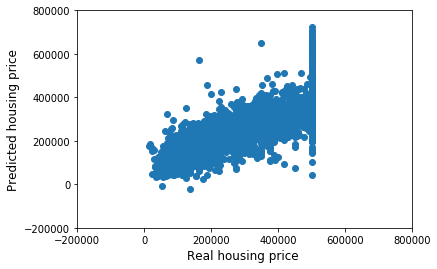

In [45]:
# Plot the results
import matplotlib.pyplot as plt

plt.scatter(housing_test_target, final_predictions) 
plt.xlim([-200000,800000])
plt.ylim([-200000,800000])
plt.xlabel(r"Real housing price ", fontsize=12)
plt.ylabel(r"Predicted housing price", fontsize=12)
plt.show()

### 4.1 Try a more advanced model

Try a more complex algorithm (SVR, RandomForest, etc.) and see if the accuracy improves (train on the full training set, and then test on the full test set). We have already done this in one of the earlier assignments so this should be easy!

Why does the accuracy improve when using a more complex algorithm in this case? Write a very breif answer in the cell below following your code.

In [50]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search_forest = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_forest.fit(housing_tr_ss, housing_tr_label)
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [51]:
# final train set cross validation scores

final_model_forest = grid_search_forest.best_estimator_

scores_forest = cross_val_score(final_model_forest, housing_tr_ss, housing_tr_label,
                         scoring="neg_mean_squared_error", cv=5)
forest_scores = np.sqrt(-scores_forest)
display_scores(forest_scores)

Cross_validation_scores: [49960.34564802 50289.77011561 48774.84585492 49444.00914464
 50000.09514055]
Cross_validation_mean_score: 49693.813180748475


In [53]:
final_model_forest = grid_search_forest.best_estimator_
final_predictions_forest = final_model_forest.predict(housing_test_ss)

final_mse_forest = mean_squared_error(final_predictions_forest,housing_test_target)
final_rmse_forest = np.sqrt(final_mse_forest)
print("RMSE_on_test_set:", final_rmse_forest)

print("RMSE_for_train = ", np.sqrt(mean_squared_error(final_model_forest.predict(housing_tr_ss),housing_tr_label)))
print("MSE_for_train = ", mean_squared_error(final_model_forest.predict(housing_tr_ss),housing_tr_label))

RMSE_on_test_set: 64040.7955645142
RMSE_for_train =  19373.505676491535
MSE_for_train =  375332722.19704974


##### YOUR ANSWER HERE 
- For our Elastic Net model, We have used polynomial features, which might bring unncecssary high variance from increasing complexity. Here we have a more complicated model random forest that performs better. This is because the main idea behind random forest is that lots of high variance and low bias trees combine to generate a low bias low variance forest, and it could deal with high variance data better.

- However, this model seems to be overfitting as well, since RMSE for train is much lower than RMSE for test.

- The RandomForest results are similar to what we have in lecture 2

# BONUS QUESTIONS

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3



For X matrix, eacdh row represents all features for each instance. Each column reprensents all instance values for one specific feature. So XT dot y in equation 4.4 will make sense: a row in XT (a column in X) dot the labes y seting the value for that feature. 
Also I have tried to prove equation 4.4 by multyplying both side of equation by XT.X. Then from y = X dot theta we could prove equation 4.4.

#[Optional]
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?



No. If the learning rate is high, then the whole process could diverge instead of converge. If you just let it run you will not get to the minimum cost function.

#[Optional]
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?



No, mini-batch, although compared to SGD, can reduce the bouncy behaviour of cost function, its cost function still can bounce up and down. We should not stop the iteration immediately when the validation error goes up, since it could be the algothrim is jumping out of the local minima.

#[Optional]
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?



This model has high bias. The learning cuves with both validation and training error high and close usually indcate that the model is underfitting. Therefore we should reduce hyperparameter alpha to reduce regularization.

#[Optional]
Why does the matrix X appears transponsed in the normal equation in the linear regression? Equation 4.4. Start from equation 4.3

